**PYTORCH WITH COMPUTER VISION**

**Model Linear with datasets FashionMNIST**



1. Import nessesary librarys

In [1]:
# import torch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib
import matplotlib.pyplot as plt

# import math
import math

print(torch.__version__)
print(torchvision.__version__)

1.13.0+cpu
0.14.0+cpu


2. Get dataset from torch.datasets.FashionMNIST

In [2]:
train_data = datasets.FashionMNIST( 
    root="data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform=None
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



Show infomation of dataset

In [3]:
print("Shape : x_train -> y_train -> x_test -> y_test")
print(train_data.data.shape)
print(train_data.targets.shape)
print(test_data.data.shape)
print(test_data.targets.shape)
print("-"*30)
print("Label Unique#")
print(train_data.targets.unique())
print("-"*30)
print("Label Classes#")
print(train_data.classes)

Shape : x_train -> y_train -> x_test -> y_test
torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])
torch.Size([10000])
------------------------------
Label Unique#
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
------------------------------
Label Classes#
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Count value of each label in train_data

In [4]:
from collections import Counter
train_classes = sorted([label for _, label in train_data])
Counter(train_classes)

Counter({0: 6000,
         1: 6000,
         2: 6000,
         3: 6000,
         4: 6000,
         5: 6000,
         6: 6000,
         7: 6000,
         8: 6000,
         9: 6000})

Visualizer train data

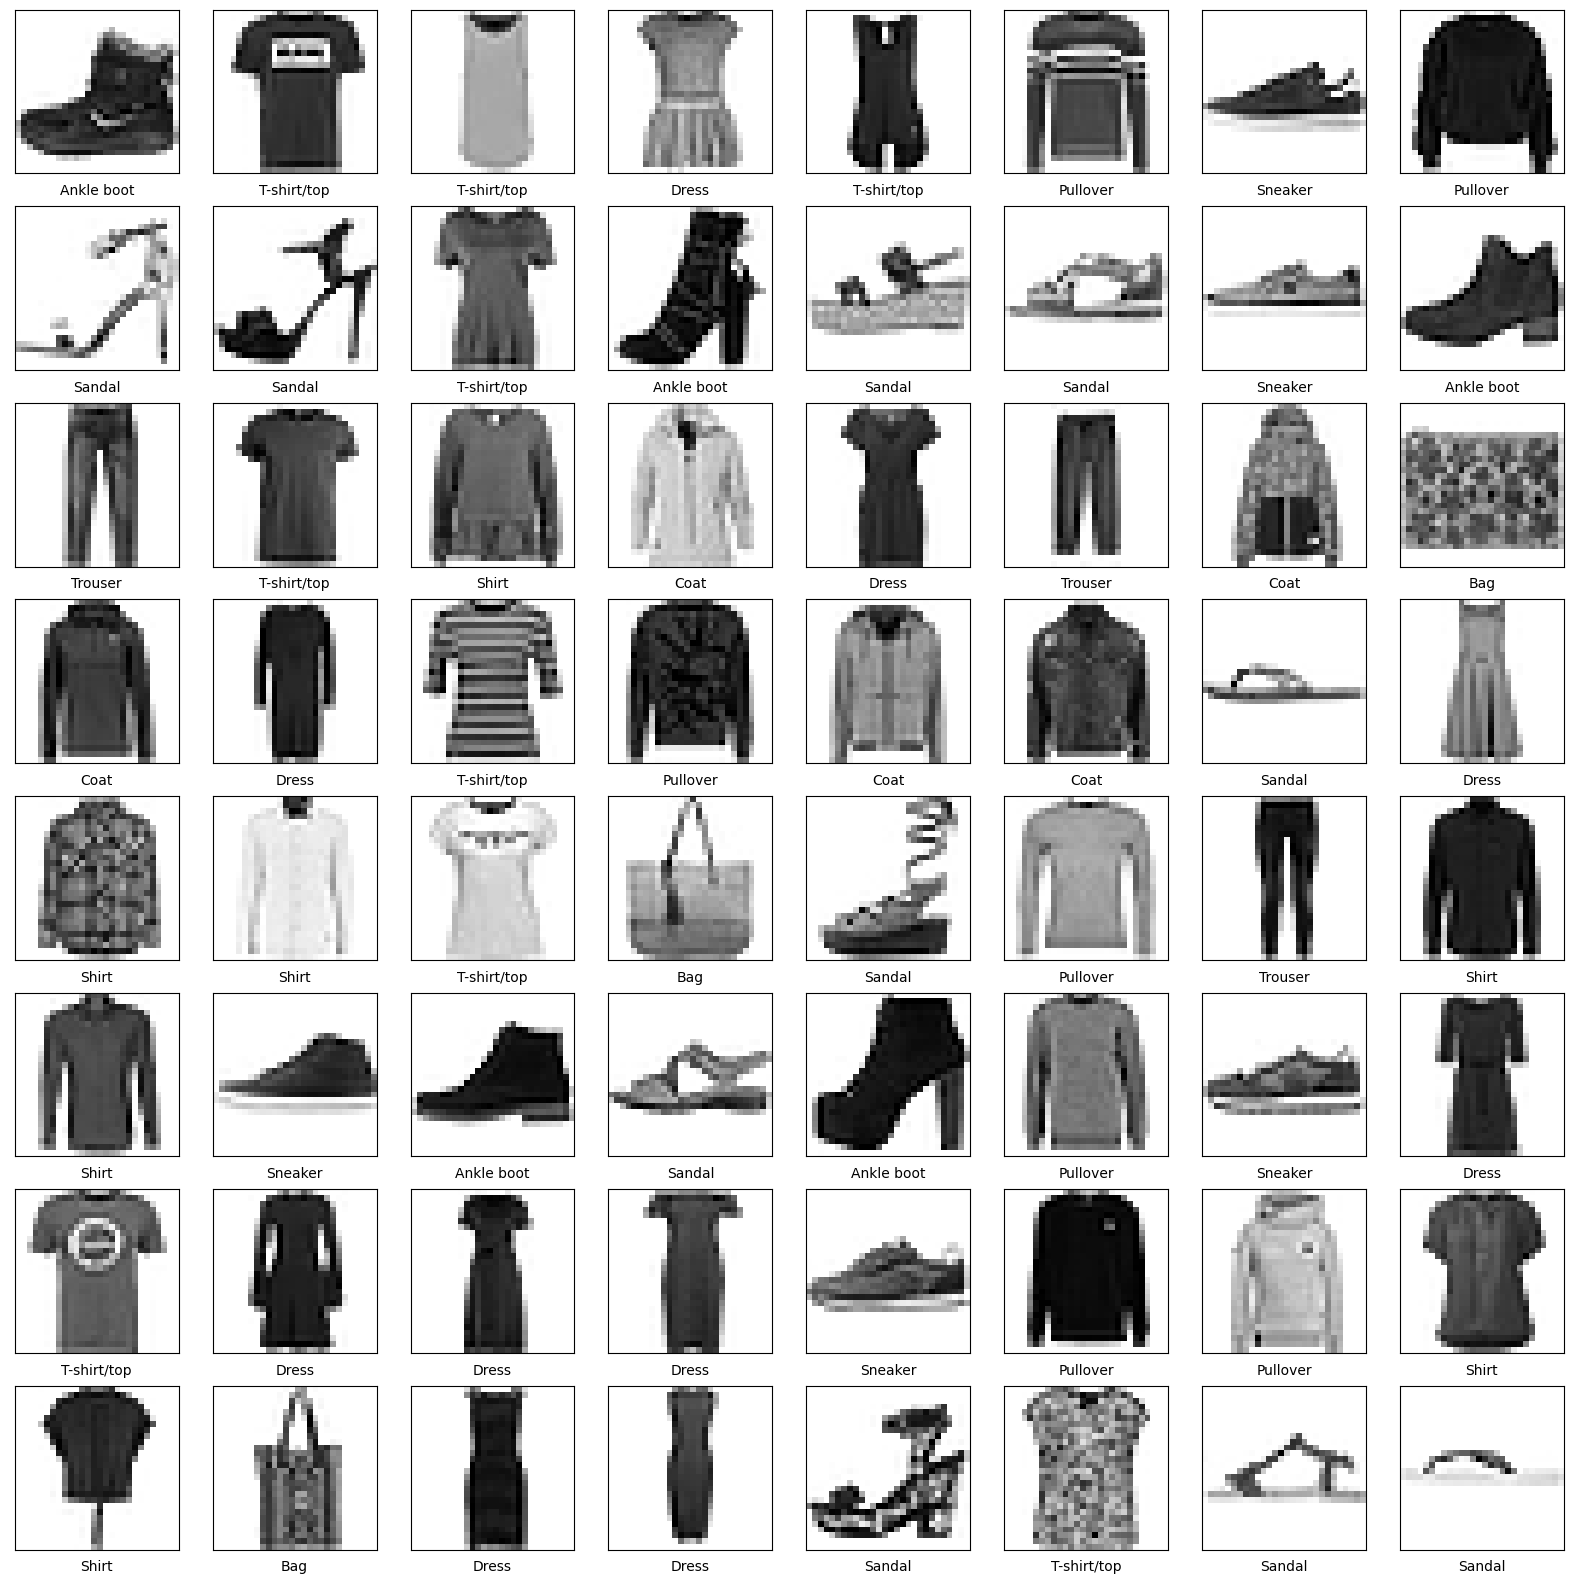

In [5]:
# Show 8x8 = 64 100 image and lable of train_data
numbers_to_display = 64
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([]) # don't show number in horizontal axis
    plt.yticks([]) # don't show number in vertical axis
    plt.imshow(train_data.data[i], cmap=plt.cm.binary) 
    plt.xlabel(train_data.classes[train_data.targets[i].item()])
plt.show()

3. DataLoader (torch.utils.data.DataLoader)

In [6]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size = BATCH_SIZE,
                              shuffle = False)

In [7]:
print("BATCH_SIZE = 32")
print(f"{len(train_dataloader)} batch in {len(train_data)} training samples")
print(f"{len(test_dataloader)} batch in {len(test_data)} testing samples")

BATCH_SIZE = 32
1875 batch in 60000 training samples
313 batch in 10000 testing samples


In [8]:
train_features , train_labels = next(iter(train_dataloader))
print("Shape of features or labels in 1 batch")
train_features.shape , train_labels.shape

Shape of features or labels in 1 batch


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

4. Build model

In [9]:
class FashionMNIST_ModelV0(nn.Module):
    def __init__(self,input_units,hidden_units,output_units):
        super().__init__()
        self.seq_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_units,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=output_units)
        )
    def forward(self,x):
        return self.seq_layer(x)

class FashionMNIST_ModelV1(nn.Module):
    def __init__(self,input_units,hidden_units,output_units):
        super().__init__()
        self.seq_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_units,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_units)
        )
    def forward(self,x):
        return self.seq_layer(x)

Initialize models

In [10]:
model_not_relu = FashionMNIST_ModelV0(
    input_units = 784,
    hidden_units = 32,
    output_units = len(train_data.classes)
)

model_relu = FashionMNIST_ModelV1(
    input_units = 784,
    hidden_units = 32,
    output_units = len(train_data.classes)
)

print(model_not_relu)
print(model_relu)

FashionMNIST_ModelV0(
  (seq_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): Linear(in_features=32, out_features=10, bias=True)
  )
)
FashionMNIST_ModelV1(
  (seq_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=32, bias=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=32, bias=True)
    (4): ReLU()
    (5): Linear(in_features=32, out_features=10, bias=True)
  )
)


5. Setup loss function, optimizer and accuracy func

In [11]:
loss_fn = nn.CrossEntropyLoss()
opt_not_relu = torch.optim.SGD(params=model_not_relu.parameters(), lr=0.05)
opt_relu = torch.optim.SGD(params=model_relu.parameters(), lr=0.05)

In [12]:
try :
    from torchmetrics import Accuracy,ConfusionMatrix
except:
    ! pip install torchmetrics
    from torchmetrics import Accuracy,ConfusionMatrix

     ------------------------------------ 519.2/519.2 kB 603.0 kB/s eta 0:00:00


In [13]:
accuracy_fn = Accuracy(task="multiclass", num_classes=len(train_data.classes))

6. Creating training func

In [15]:
from tqdm.auto import tqdm
def training(model : nn.Module,
            loss_fn : nn.CrossEntropyLoss,
            opt : torch.optim.SGD,
            accuracy_fn,
            EPOCHS=25):
    
    epoch_list = []
    loss_train_list = []
    loss_test_list = []
    acc_train_list = []
    acc_test_list = []

    for epoch in tqdm(range(EPOCHS)):
        print(f"\nEPOCH {epoch}")
        print("-"*30)

        # Training
        model.train()
        loss_train = 0
        acc_train = 0
        for batch,(X_train,y_train) in enumerate(train_dataloader):
            y_pred = model(X_train)
            loss = loss_fn(y_pred,y_train)
            loss_train += loss

            y_pred_label = y_pred.argmax(dim=1)
            acc_train += accuracy_fn(y_pred_label,y_train)

            opt.zero_grad()
            loss.backward()
            opt.step()

            if batch*BATCH_SIZE % 6000 == 0:
                print(f"Processing {batch*BATCH_SIZE}/{len(train_dataloader.dataset)}")
            
        loss_train /= len(train_dataloader)
        acc_train /= len(train_dataloader)
        
        # Evaluting
        model.eval()
        loss_test = 0
        acc_test = 0
        with torch.inference_mode():
            for batch,(X_test,y_test) in enumerate(test_dataloader):
                y_pred = model(X_test)
                loss_test += loss_fn(y_pred,y_test)

                y_pred_label = y_pred.argmax(dim=1)
                acc_test += accuracy_fn(y_pred_label,y_test)

            loss_test /= len(test_dataloader)
            acc_test /= len(test_dataloader)
        
        print(f"## Loss train: {loss_train}, Acc train: {acc_train}, Loss test: {loss_test}, Acc test: {acc_test}")
        epoch_list.append(epoch)
        loss_train_list.append(loss_train.detach().numpy())
        loss_test_list.append(loss_test.detach().numpy())
        acc_train_list.append(acc_train)
        acc_test_list.append(acc_test)

    return model,(epoch_list,loss_train_list,loss_test_list,acc_train_list,acc_test_list)

Initialize training 

In [16]:
%%time
model_not_relu,eval_value_not_relu = training(model=model_not_relu,
                                            loss_fn=loss_fn,
                                            opt=opt_not_relu,
                                            accuracy_fn=accuracy_fn)

  0%|          | 0/25 [00:00<?, ?it/s]


EPOCH 0
------------------------------
Processing 0/60000
Processing 12000/60000
Processing 24000/60000
Processing 36000/60000
Processing 48000/60000
## Loss train: 0.6321842074394226, Acc train: 0.7761833071708679, Loss test: 0.5316869616508484, Acc test: 0.8086062073707581

EPOCH 1
------------------------------
Processing 0/60000
Processing 12000/60000
Processing 24000/60000
Processing 36000/60000
Processing 48000/60000
## Loss train: 0.4799116253852844, Acc train: 0.8302666544914246, Loss test: 0.4909592866897583, Acc test: 0.8211861252784729

EPOCH 2
------------------------------
Processing 0/60000
Processing 12000/60000
Processing 24000/60000
Processing 36000/60000
Processing 48000/60000
## Loss train: 0.4551536440849304, Acc train: 0.8406166434288025, Loss test: 0.4820638597011566, Acc test: 0.833765983581543

EPOCH 3
------------------------------
Processing 0/60000
Processing 12000/60000
Processing 24000/60000
Processing 36000/60000
Processing 48000/60000
## Loss train: 0.44

KeyboardInterrupt: 

In [37]:
%%time
model_relu,eval_value_relu = training(model=model_relu,
                                    loss_fn=loss_fn,
                                    opt=opt_relu,
                                    accuracy_fn=accuracy_fn)

  0%|          | 0/25 [00:00<?, ?it/s]


EPOCH 0
------------------------------
Processing 0/60000
Processing 12000/60000
Processing 24000/60000
Processing 36000/60000
Processing 48000/60000
## Loss train: 0.6354552507400513, Acc train: 0.7745000123977661, Loss test: 0.5829164385795593, Acc test: 0.7899361252784729

EPOCH 1
------------------------------
Processing 0/60000
Processing 12000/60000
Processing 24000/60000
Processing 36000/60000
Processing 48000/60000
## Loss train: 0.4801937937736511, Acc train: 0.8294333219528198, Loss test: 0.5012294054031372, Acc test: 0.8225838541984558

EPOCH 2
------------------------------
Processing 0/60000
Processing 12000/60000
Processing 24000/60000
Processing 36000/60000
Processing 48000/60000
## Loss train: 0.4556640088558197, Acc train: 0.840499997138977, Loss test: 0.4756011962890625, Acc test: 0.8271765112876892

EPOCH 3
------------------------------
Processing 0/60000
Processing 12000/60000
Processing 24000/60000
Processing 36000/60000
Processing 48000/60000
## Loss train: 0.44

7. Creating Visualize func

In [38]:
def visualize_loss_acc(eval_value):
    epoch_list,loss_train_list,loss_test_list,acc_train_list,acc_test_list = eval_value
    plt.figure(figsize=(18,8))
    plt.suptitle("Visualize Loss and Accuracy", fontsize=18)

    plt.subplot(1,2,1)
    plt.plot(epoch_list,loss_train_list,label="Training Loss")
    plt.plot(epoch_list,loss_test_list,label="Testing Loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epoch_list,acc_train_list,label="Training Accuracy")
    plt.plot(epoch_list,acc_test_list,label="Testing Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.show()

Initialize visualize

RuntimeError: ignored

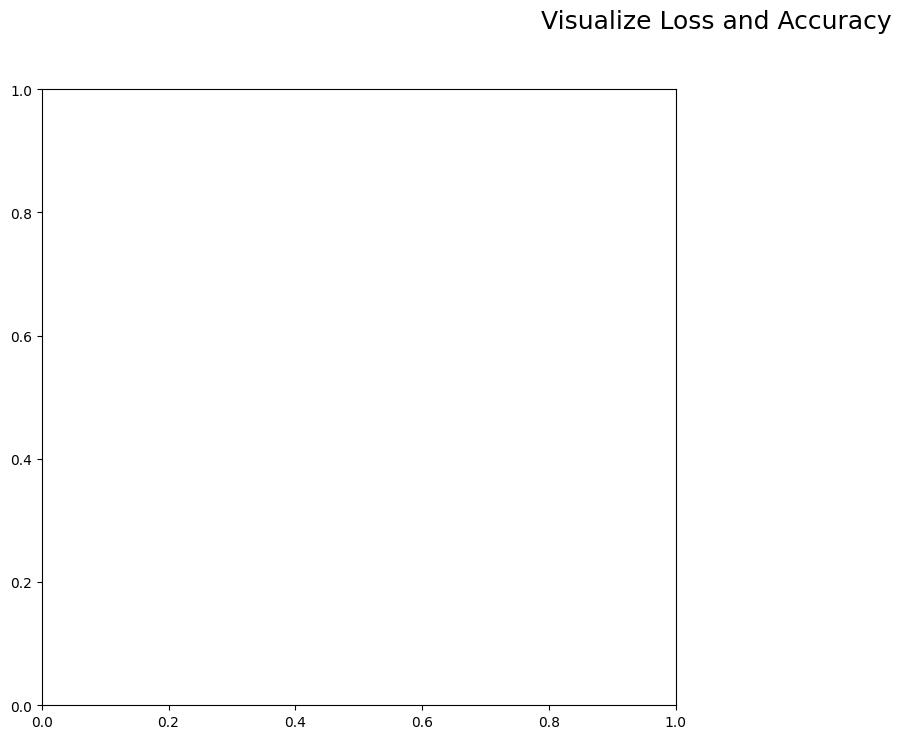

In [39]:
visualize_loss_acc(eval_value)

In [ ]:
visualize_loss_acc(eval_value_relu)

8. Creating Eval model func

In [40]:
def eval_model(model : nn.Module,
              dataloader : torch.utils.data.DataLoader,
              loss_fn : nn.CrossEntropyLoss,
              accuracy_fn):
    
    model.eval()
    with torch.inference_mode():
        loss = 0
        acc = 0
        for X,y in dataloader :
            y_pred = model(X)
            loss += loss_fn(y_pred,y)

            y_ped_label = y_pred.argmax(dim=1)
            acc += accuracy_fn(y_ped_label,y)

        loss /= len(dataloader)
        acc /= len(dataloader)

    return loss,acc

In [41]:
loss_train,acc_train = eval_model(
    model=model_not_relu,
    dataloader=train_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn)
print(f"Evaluting model not relu# Train Dataloader# Loss : {loss_train}, Acc : {acc_train}")

loss_test,acc_test = eval_model(
    model=model_not_relu,
    dataloader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn)
print(f"Evaluting model not relu# Test Dataloader# Loss : {loss_test}, Acc : {acc_test}")

Evaluting model not relu# Train dataloader# Loss : 0.40434712171554565, Acc : 0.859250009059906
Evaluting model not relu# Test dataloader# Loss : 0.4804428219795227, Acc : 0.8333666324615479


In [42]:
loss_train,acc_train = eval_model(
    model=model_relu,
    dataloader=train_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn)
print(f"Evaluting model relu# Train Dataloader# Loss : {loss_train}, Acc : {acc_train}")

loss_test,acc_test = eval_model(
    model=model_relu,
    dataloader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn)
print(f"Evaluting model relu# Test Dataloader# Loss : {loss_test}, Acc : {acc_test}")

Evaluting model relu# Train dataloader# Loss : 0.3831934928894043, Acc : 0.8656666874885559
Evaluting model relu# Test dataloader# Loss : 0.460781455039978, Acc : 0.8407548069953918


9. Save model

In [43]:
from pathlib import Path 

MODEL = Path("model")
MODEL.mkdir(parents=True,exist_ok=True)

In [44]:
MODEL_NAME_NOT_RELU = "model_FashionMNIST_Linear_not_relu"
MODEL_PATH_NOT_RELU = MODEL / MODEL_NAME_NOT_RELU

torch.save(obj=model_not_relu.state_dict(),f=MODEL_PATH_NOT_RELU)

In [45]:
MODEL_NAME_RELU = "model_FashionMNIST_Linear_relu"
MODEL_PATH_RELU = MODEL / MODEL_NAME_RELU

torch.save(obj=model_relu.state_dict(),f=MODEL_PATH_RELU)

**END**